# **Assignment 10 - Jburns**

Ignoring Boston df questions

In [1]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library
import seaborn as sns

In [2]:
# Load datasets here once and assign to variables iris and boston
iris = ds.load_iris()
# load_boston was removed from Scikit so I will just be using a raw link from github
file_git = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston = pd.read_csv(file_git)

**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [3]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print(iris_df.head(5))
print(iris['target_names'].tolist())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
['setosa', 'versicolor', 'virginica']


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [4]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
iris = load_iris()
x_data = iris.data
y_target = iris.target
targ_names = iris['target_names']
new_obs= [[5.0, 3.6, 1.8, 0.2], [6.5, 3.0, 4.5, 1.8]] #new set of data to feed into knn
new_obs2=[[5.5, 2.6, 4.4, 1.2],
          [7.2, 3.6, 6.1, 2.5], 
          [5.1, 3.5, 1.4, 0.3]]
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_data,y_target)
predicted_data = knn.predict(new_obs2)
predicted_names = targ_names[predicted_data]
print(predicted_names) ## added a few examples for new observation data to try out 2 versus three obs


['versicolor' 'virginica' 'setosa']


**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [12]:
# Libraries needed for this step
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load back the original iris data
iris=load_iris()
x_data, y_target = iris.data, iris.target # Set up the data and target variables again
# segment out the testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.4, random_state=42)

# Fit the new knn model
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_predicted = knn.predict(x_test)
accuracy_fit1 = accuracy_score(y_test, y_predicted)
print("Accuracy Score for fit 1:", accuracy_fit1)

Accuracy Score for fit 1: 0.9833333333333333


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

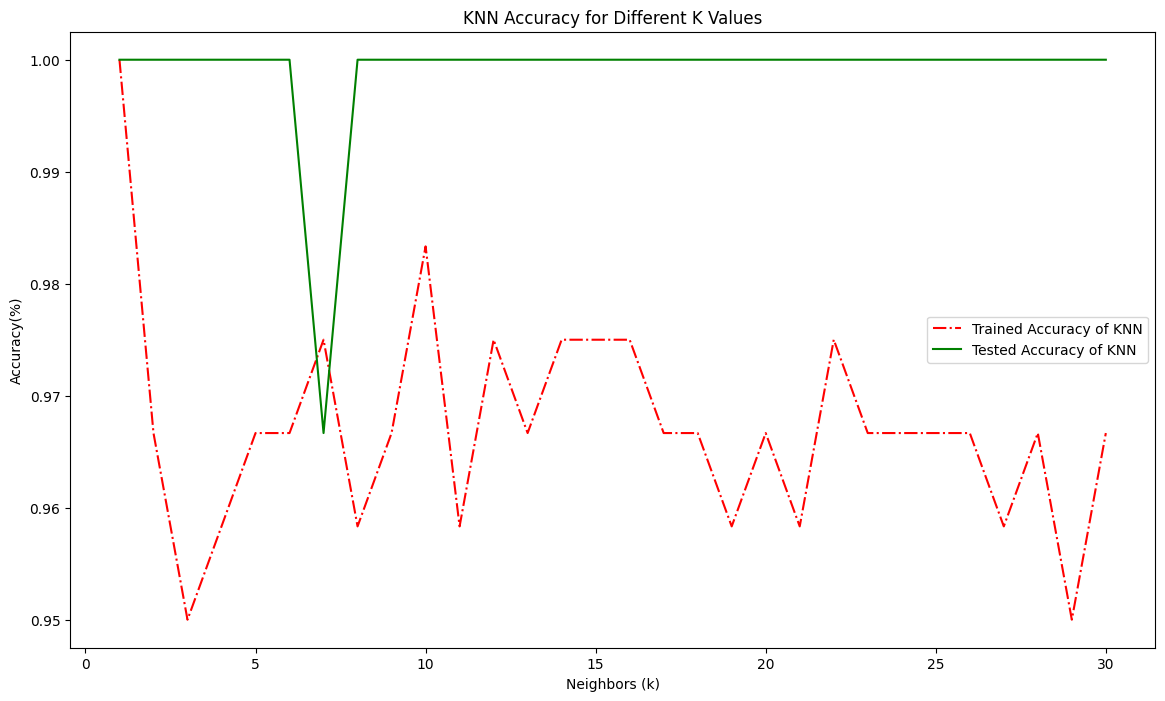

In [19]:
# Libraries needed for this step
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load back the original iris data
iris=load_iris()
x_data, y_target = iris.data, iris.target # Set up the data and target variables again
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.2, random_state=42)
tested_accuracy=[]
trained_accuracy=[]
n_range = range(1,31)
for k in n_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    # How accurate is the testing dataset?
    testing_accuracy = knn.score(x_test, y_test)
    tested_accuracy.append(testing_accuracy)

    #How accurate is the training dataset?
    training_accuracy = knn.score(x_train, y_train)
    trained_accuracy.append(training_accuracy)
#Now plot the over or underfitting of the knn curves
plt.figure(figsize=(14, 8))
plt.plot(n_range, trained_accuracy, label='Trained Accuracy of KNN', linestyle='dashdot', color='r')
plt.plot(n_range, tested_accuracy, label='Tested Accuracy of KNN', color='g')
plt.xlabel('Neighbors (k)')
plt.ylabel('Accuracy(%)')
plt.title('KNN Accuracy for Different K Values')
plt.legend()
plt.show()

**Q5** 10 pts

**Data set: Boston**


* Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Boston target values into a separate DataFrame

* Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values 

**Q6** 

**Data set: Boston**

* In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

* Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

* Return back PTRATIO as a NumPy array

**Q7**

**Data set: Boston**

* Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib


* Use np.linspace() to generate prediction X values from min to max PTRATIO

* Return back the regression prediction space and regression predicted values

* Make sure to labels axes appropriately